# Lecture 8 - Feature Selection (continued) & Feature Extraction

In [42]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('seaborn')

import pandas as pd
import seaborn as sns

In [4]:
df_wine = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/wine/wine.data', header=None)

In [5]:
df_wine.columns = ['Class label', 'Alcohol','Malic acid', 'Ash',
                   'Alcalinity of ash', 'Magnesium','Total phenols', 'Flavanoids',
                   'Nonflavanoid phenols','Proanthocyanins','Color intensity', 'Hue',
                   'OD280/OD315 of diluted wines','Proline']

In [6]:
df_wine.head()

,Class label,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315 of diluted wines,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [8]:
print('Class labels ', np.unique(df_wine['Class label']))

Class labels  [1 2 3]


In [9]:
from sklearn.model_selection import train_test_split

X, y = df_wine.iloc[:,1:].values, df_wine.iloc[:,0].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [10]:
from sklearn.preprocessing import MinMaxScaler

mms = MinMaxScaler()
X_train_norm = mms.fit_transform(X_train)
X_test_norm = mms.transform(X_test)

In [11]:
from sklearn.preprocessing import StandardScaler

stdsc = StandardScaler()
X_train_std = stdsc.fit_transform(X_train)
X_test_std = stdsc.fit_transform(X_test)

# Feature Selection

## Selecting meaningful features

If we notice that a model performs much better on a training dataset than on the test dataset, this observation is a strong indicator for overfitting. Overfitting means that model fits the parameters too closely to the particular observations in the training dataset but does not generalize well to real data—we say that the model has a high variance. A reason for overfitting is that our model is too complex for the given training data and common solutions to reduce the generalization error are listed
as follows:

* Collect more training data

* Introduce a penalty for complexity via regularization

* Choose a simpler model with fewer parameters

* Reduce the dimensionality of the data

Let's look at common ways to reduce overfitting by regularization and dimensionality reduction via feature selection. In particular:

1. Sparse solutions with L1 regularization, and

2. Sequential feature selection algorithms

### 1. Sparse solutions with L1 regularization

Recall our Linear Regression problem where we used the **L2 regularization** approach to reduce the complexity of a model by penalizing large individual weights, where we defined the L2 norm of our weight vector $\mathbf{w}$ as follows:

$$\text{L2: }\Vert\mathbf{w}\Vert_2^2 = \sum_{j=0}^M w_j^2$$

Another approach to reduce the model complexity is the related **L1 regularization**:

$$\text{L1: }\Vert\mathbf{w}\Vert_1 = \sum_{j=0}^M |w_j|$$

In contrast to L2 regularization, L1 regularization yields sparse feature vectors; most feature weights will be zero. Sparsity can be useful in practice if we have a high-dimensional dataset with many features that are irrelevant, especially cases where we have more irrelevant dimensions than samples. In this sense, L1 regularization can be understood as a technique for feature selection.

In [12]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression(penalty='l1', C=0.1, multi_class='auto')
lr.fit(X_train_std, y_train)

print('Training accuracy: ',lr.score(X_train_std, y_train))
print('Test accuracy: ',lr.score(X_test_std, y_test))

Training accuracy:  0.9919354838709677
Test accuracy:  0.9074074074074074


C:\Users\Catia\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [13]:
lr.intercept_

array([-0.47484531,  0.        , -0.79143771])

In [14]:
lr.coef_

array([[ 0.19567896,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.57257738,  0.        ,  0.        ,  0.        ,
         0.        ,  0.03284845,  1.44435481],
       [-0.71791126,  0.        , -0.08708241,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        , -0.86240507,
         0.1039819 ,  0.        , -0.50797491],
       [ 0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        , -0.72829701,  0.        ,  0.        ,  0.59075855,
        -0.3817243 , -0.36439172,  0.        ]])

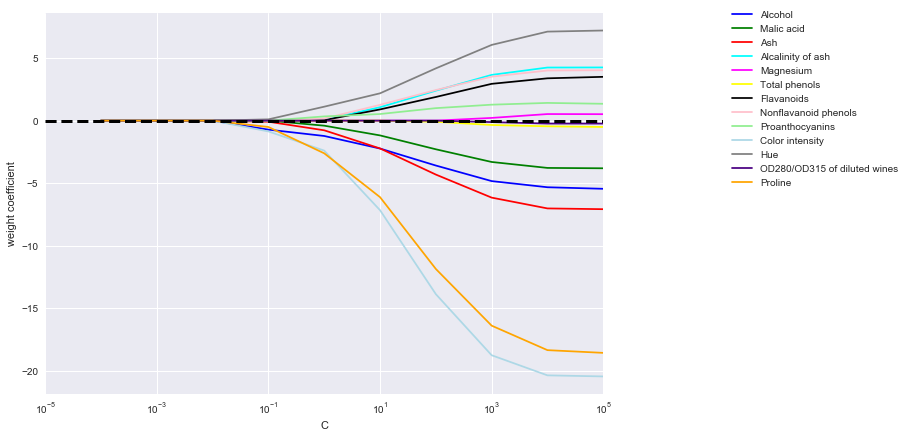

In [15]:
fig = plt.figure(figsize=(10,7))
ax = plt.subplot(111)
colors = ['blue', 'green', 'red', 'cyan', 'magenta',
          'yellow', 'black','pink', 'lightgreen',
          'lightblue','gray', 'indigo', 'orange']

weights, params = [], []

for c in np.arange(-4, 6):
    lr = LogisticRegression(penalty='l1', C=10.0**c, random_state=0, solver='liblinear', multi_class='auto')
    lr.fit(X_train_std, y_train)
    weights.append(lr.coef_[1])
    params.append(10.0**c)
    w = np.array(weights)
    
for column, color in zip(range(w.shape[1]), colors):
    plt.plot(params, w[:, column], label=df_wine.columns[column+1],color=color)
plt.axhline(0, color='black', linestyle='--', linewidth=3)
plt.xlim([10.0**(-5), 10.0**5])
plt.ylabel('weight coefficient')
plt.xlabel('C')
plt.xscale('log')
plt.legend(loc='upper left',)
ax.legend(loc='upper center', bbox_to_anchor=(1.38, 1.03), ncol=1, fancybox=True)
plt.show()

### 2. Sequential feature selection algorithms

An alternative way to reduce the complexity of the model and avoid overfitting is dimensionality reduction via feature selection, which is especially useful for unregularized models. There are two main categories of dimensionality reduction techniques: feature selection and feature extraction. 

* Using feature selection, we select a subset of the original features. 
* In feature extraction, we derive information from the feature set to construct a new feature subspace.

Sequential feature selection algorithms are a family of greedy search algorithms that are used to reduce an initial $d$-dimensional feature space to a $k$-dimensional feature subspace where $k<d$. The motivation behind feature selection algorithms is to automatically select a subset of features that are most relevant to the problem to improve computational efficiency or reduce the generalization error of the model by removing irrelevant features or noise, which can be useful for algorithms that don't support regularization. 

A classic sequential feature selection algorithm is **Sequential Backward Selection (SBS)**, which aims to reduce the dimensionality of the initial feature subspace with a minimum decay in performance of the classifier to improve upon computational efficiency. In certain cases, SBS can even improve the predictive power of the model if a model suffers from overfitting.

The idea behind the SBS algorithm is quite simple: SBS sequentially removes features from the full feature subset until the new feature subspace contains the desired number of features. In order to determine which feature is to be removed at each stage, we need to define criterion function $J$ that we want to minimize. The criterion calculated by the criterion function can simply be the difference in performance of the classifier after and before the removal of a particular feature. Then the feature to be removed at each stage can simply be defined as the feature that maximizes this criterion; or, in more intuitive terms, at each stage we eliminate the feature that causes the least performance loss after removal. Based on the preceding definition of SBS, we can outline the algorithm in 4 simple steps:

1. Initialize the algorithm with $k=d$, where $d$ is the dimensionality of the full feature space $\mathbf{X}_d$.

2. Determine the feature $x^-$ that maximizes the criterion $x^- = \arg\max J(\mathbf{X}_k - x^-)$ where $x \in \mathbf{X}_k$.

3. Remove the feature $x^-$ from the feature set.

4. Terminate if $k$ equals the number of desired features, if not, go to step 2.

Unfortunately, the SBS algorithm is not implemented in scikit-learn, yet. But since it is so simple, let's go ahead and implement it in Python from scratch:

In [30]:
from sklearn.base import clone
from itertools import combinations
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [31]:
# Source code: "Python Machine Learning" by Sebastian Raschka

class SBS():
    def __init__(self, estimator, k_features,
        scoring=accuracy_score,test_size=0.25, random_state=1):
        self.scoring = scoring
        self.estimator = clone(estimator)
        self.k_features = k_features
        self.test_size = test_size
        self.random_state = random_state
    
    def fit(self, X, y):
        X_train, X_test, y_train, y_test = \
        train_test_split(X, y, test_size=self.test_size, random_state=self.random_state)
        dim = X_train.shape[1]
        self.indices_ = tuple(range(dim))
        self.subsets_ = [self.indices_]
        score = self._calc_score(X_train, y_train,
                                 X_test, y_test, self.indices_)
        self.scores_ = [score]
        
        while dim > self.k_features:
            scores = []
            subsets = []
            for p in combinations(self.indices_, r=dim-1):
                score = self._calc_score(X_train, y_train, X_test, y_test, p)
                scores.append(score)
                subsets.append(p)
            best = np.argmax(scores)
            self.indices_ = subsets[best]
            self.subsets_.append(self.indices_)
            dim -= 1
            self.scores_.append(scores[best])
        self.k_score_ = self.scores_[-1]
        return self
    
    def transform(self, X):
        return X[:, self.indices_]
    
    def _calc_score(self, X_train, y_train, X_test, y_test, indices):
        self.estimator.fit(X_train[:, indices], y_train)
        y_pred = self.estimator.predict(X_test[:, indices])
        score = self.scoring(y_test, y_pred)
        return score

Now, let's see our SBS implementation in action using the K-NN classifier from scikit-learn:

In [32]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=2)
sbs = SBS(knn, k_features=1)

sbs.fit(X_train_std, y_train);

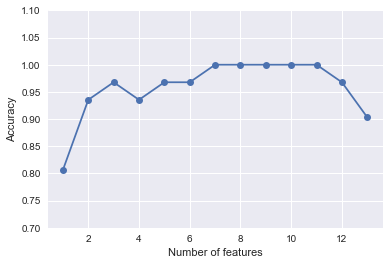

In [33]:
k_feat = [len(k) for k in sbs.subsets_]

plt.plot(k_feat, sbs.scores_, marker='o')
plt.ylim([0.7, 1.1])
plt.ylabel('Accuracy')
plt.xlabel('Number of features');

As we can see in the following plot, the accuracy of the KNN classifier improved on the validation dataset as we reduced the number of features, which is likely due to a decrease of the **curse of dimensionality**.

Also, we can see in the following plot that the classifier achieved 100 percent accuracy for $k=\{5, 6, 7, 8, 9, 10, 11\}$.

In [35]:
k5 = list(sbs.subsets_[6])
print(df_wine.columns[1:][k5])

Index(['Alcohol', 'Magnesium', 'Total phenols', 'Flavanoids',
       'Proanthocyanins', 'Hue', 'Proline'],
      dtype='object')


Next let's evaluate the performance of the KNN classifier on the original test set:

In [36]:
knn.fit(X_train_std, y_train)

print('Training accuracy:', knn.score(X_train_std, y_train))
print('Test accuracy:', knn.score(X_test_std, y_test))

Training accuracy: 0.9596774193548387
Test accuracy: 0.9629629629629629


In the preceding code, we used the complete feature set and obtained $\sim 96.0$ percent accuracy on the training dataset. However, the accuracy on the test dataset was slightly lower ($\sim 96.3$ percent), which is an indicator of a slight degree of overfitting. Now let's use the selected 5-feature subset and see how well K-NN performs:

In [37]:
knn.fit(X_train_std[:, k5], y_train)

print('Training accuracy:', knn.score(X_train_std[:, k5], y_train))
print('Test accuracy:', knn.score(X_test_std[:, k5], y_test))

Training accuracy: 0.9919354838709677
Test accuracy: 0.9629629629629629


Using fewer than half of the original features in the Wine dataset, the prediction accuracy on the test set improved by almost 2 percent. Also, we reduced overfitting, which we can tell from the small gap between test ($\sim 96.3$ percent) and training
($\sim 96.0$ percent) accuracy.

<div class="alert alert-info">
    <b>Feature selection algorithms in scikit-learn</b>

There are many more feature selection algorithms available via scikit-learn. Those include recursive backward elimination based on feature weights, tree-based methods to select features by importance, and univariate statistical tests. A comprehensive discussion of the different feature selection methods is beyond the scope of this book, but a good summary with illustrative examples can be found [here](http://scikit-learn.org/stable/modules/feature_selection.html).
</div>

# Feature Extraction

An alternative approach to feature selection for dimensionality reduction is **feature extraction**. We will learn about a couple of fundamental techniques that will help us to summarize the information content of a dataset by transforming it onto a new feature subspace of lower dimensionality than the original one:

* **Principal Component Analysis (PCA)** for unsupervised data compression

* **Linear Discriminant Analysis (LDA)** as a supervised dimensionality reduction technique for maximizing class separability

Data compression is an important topic in machine learning, and it helps us to store and analyze the increasing amounts of data that are produced and collected in the modern age of technology.

## Principal Component Analysis (PCA)

Principal component analysis (PCA) is an unsupervised linear transformation technique that is widely used across different fields, most prominently for dimensionality reduction.

* PCA aims to find the directions of maximum variance in high-dimensional data and projects it onto a new subspace with equal or fewer dimensions that the original one. 

The orthogonal axes (**principal components**) of the new subspace can be interpreted as the directions of maximum variance given the constraint that the new feature axes are orthogonal to each other.

* PCA takes data from *sensor coordinates* to *data centric coordinates* using linear transformations.

* PCA uses a **linear transformation** to **minimize the redundancy** of the resulting transformed data (by ending up with data that is uncorrelated).
    * This means that every transformed dimension is more informative.
    * In this approach, the dimensionality of the space is still the same as the original data, but the space of features are now arranged such that they contain the most information.

* If we wish to reduce dimensionality of our feature space, we can choose only the features that carry over the most information in the linearly transformed space.
    * In other words, PCA will find the underlying **linear manifold** that the data is embedded in.

* **PCA finds the directions of maximum variance in high-dimensional data and projects it onto a new subspace with equal or fewer dimensions than the original one**.

Consider the data $X$ comprised on $N$ data samples in a D-dimensional space, so $X$ is a matrix of size $D\times N$.

The **first step** in PCA is to centralize or demean $X$.

* Without loss of generality, let's assume that we subtracted the mean to the input data, $X$. Now, $X$ has zero mean.

The **second step** is to find the linear transformation $A$ that transforms $X$ to a space where features are:
1. Uncorrelated (preserve all dimensions)
2. reduced (dimensionality reduction)

$$Y = AX$$

where $A$ is a $D\times D$ matrix, $X$ is a $D\times N$ data matrix and therefore $Y$ is also a $D\times N$ transformed data matrix.

The variance of the transformed data $Y$ is given by:

\begin{align}
R_y &= E[YY^T] \\
&= E[AX(AX)^T] \\
&= E[AXX^TA^T] \\
&= AE[XX^T]A^T \\
&= AR_xA^T
\end{align}

Note that we are computing the variance along the dimensions of $Y$, therefore, $R_y$ is a $D\times D$ matrix. Similarly, $R_X$ represents the covariance of the data $X$. Covariances matrices are symmetric therefore $R_X=R_X^T$ and $R_Y=R_Y^T$.

Similarly, $R_X$ represents the covariance of the data $X$. 

If we write $A$ in terms of vector elements:

$$A = \left[\begin{array}{cc}
a_{11} & a_{12}\\
a_{21} & a_{22}
\end{array}\right]=\left[\begin{array}{c}
\overrightarrow{a_{1}}\\
\overrightarrow{a_{2}}
\end{array}\right]$$

Then,

\begin{align}
R_y &= \left[\begin{array}{c}a_{1}\\a_{2}\end{array}\right] R_X \left[\begin{array}{cc}a_{1} & a_{2}\end{array}\right] \\
&= \left[\begin{array}{cc} a_1 R_X a_1^T & a_1 R_X a_2^T\\ a_2 R_X a_1^T & a_2 R_X a_2^T\end{array}\right]
\end{align}

* If we want to represent the data in a space in which the features are **uncorrelated**, what shape does the covariance matrix have to take?

Diagonal! Why?

* Can we use the eigenvectors of $R_X$ as our linear transformation $A$?

Consider the case where we are trying to project the data $X$ into a 1-dimensional space, so we are trying to find the direction $a_1$ where maximal data variance is preserved:

$$\arg_{a_1} \max a_1 R_X a_1^T$$

We want this solution to be bounded (considering $a_1 = \infty$ would maximize), so we need to constraint the vector to have norm 1

$$\Vert a_1\Vert_2^2 = 1 \iff a_1 a_1^T = 1$$

Then, we using Lagrange Optimization:

$$\mathcal{L} = a_1 R_X a_1^T + \lambda_1 (1-a_1 a_1^T)$$

Solving for $a_1$:

\begin{align}
\frac{\partial \mathcal{L}}{\partial a_1} &= 0 \\
R_X a_1^T + R_X^T a_1^T - 2\lambda_1 a_1^T &= 0 \\
R_X a_1^T = \lambda a_1^T
\end{align}

* Does this look familiar?

This is stating that $a_1^T$ must be an eigenvector of $R_X$!

So coming back to the question "Can we use the eigenvectors of $X$ as our linear transformation $A$?" YES!

* If we left multiply by $a_1$ and make use of $a_1a_1^T = 1$:

$$a_1 R_X a_1^T = \lambda_1$$

**So the variance will be maximum when we set the project direction $a_1$ equal to the eigenvector having the largest eigenvalue $\lambda_1$**.

* This eigenvector is known as the firt **principal component**.

* As you may anticipate, the linear trasnformation $A$ will the be a matrix whose row entries are **sorted** the eigenvectors (sorted by their correspondent eigenvalue).

$$A = \left[\begin{array}{c}
\overrightarrow{a_{1}}\\
\overrightarrow{a_{2}}
\end{array}\right]$$

where $a_1$ and $a_2$ are eigenvectors of $R_X$ with correspondent eigenvalues $\lambda_1$ and $\lambda_2$ with $\lambda_1>\lambda_2$.

### Steps of PCA

Consider the data $X$:

1. Subtract the mean $\mu = \frac{1}{N}\sum_{i=1}^N x_i$

2. Compute the covariance matrix $R_X$

3. Compute eigenvectors and eigenvalues of the matrix $R_X$. Tip: sort the eigenvectors ($e_i$) in decreasing eigenvalue ($\lambda_i$) order.

4. The linear transformation $A$ will be: $A = \left[\begin{array}{c} \overrightarrow{u_{1}}\\ \overrightarrow{u_{2}} \end{array}\right]$, where $\lambda_1 > \lambda_2$

5. Transformed data: $y=Ax$

Note that the formal definition of covariance already accounts for demeaning the data.

In [89]:
def PCA(X, m, display=1):
    '''This function implements PCA. The data matrix X is DxN matrix, 
    where D is the dimension and N the number of points'''
    
    D,N = X.shape
    
    # Demean the Data
    data = X - X.mean(axis=1).reshape(-1, 1)
    
    # Covariance of the input data X
    cov_mat = np.cov(data)
    if display:
        sns.heatmap(cov_mat)
        plt.title('Covariance Matrix')
        plt.show();
    
    # Find eigenvectors and eigenvalues 
    eigen_vals, eigen_vecs = np.linalg.eig(cov_mat)
    if display:
        print(eigen_vals)
    
    # Sort eigenvectors by magnitude of eigenvalues
    eigen_pairs = [(np.abs(eigen_vals[i]), eigen_vecs[:,i]) for i in range(len(eigen_vals))]
    eigen_pairs = sorted(eigen_pairs, key=lambda x: x[0], reverse=True)

    # Linear transformation
    A = np.hstack(([eigen_pairs[i][1][:, np.newaxis] for i in range(m)]))
    
    #compute explained variance and plot
    if display:
        total = sum(eigen_vals)
        var_explained = [(i/total) for i in sorted(eigen_vals, reverse=True)]
        cum_var_exp = np.cumsum(var_explained)
        plt.bar(range(1,D+1), var_explained, alpha=0.5, align='center', label='individual explained variance')
        plt.step(range(1,D+1), cum_var_exp, alpha=0.5, where='mid', label='cumulative explained variance')
        plt.ylabel('Explained variance ratio')
        plt.xlabel('Principal components')
        plt.legend(loc='best')
        plt.show();
    return A

In [71]:
X_train_std.shape

(124, 13)

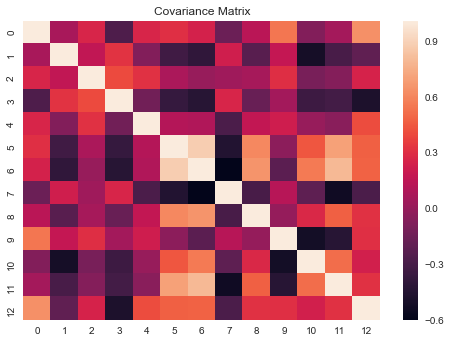

[4.65355345 2.55054636 1.31570488 1.00858224 0.88696062 0.74639311
 0.60003412 0.07269516 0.15784276 0.34159028 0.21812562 0.25716644
 0.29649601]


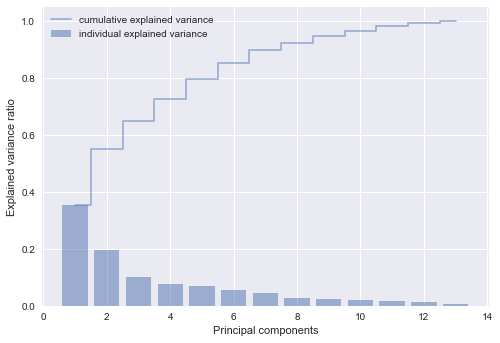

In [98]:
A = PCA(X_train_std.T, 13, display=1)

The resulting plot indicates that the first principal component alone accounts for 40 percent of the variance. Also, we can see that the first two principal components combined explain almost 60 percent of the variance in the data.

Although the explained variance plot reminds us of the feature importance, we shall remind ourselves that PCA is an unsupervised method, which means that information about the class labels is ignored.

In [108]:
X_train_pca = X_train_std@A

print(X_train_std.shape, X_train_pca.shape)

(124, 13) (124, 2)


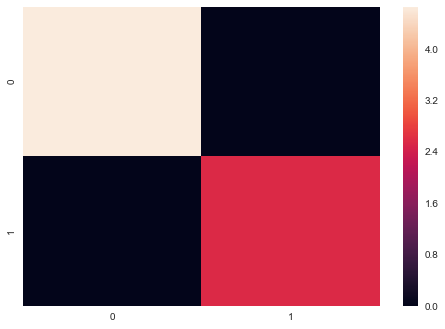

In [109]:
cov_mat = np.cov(X_train_pca.T)

sns.heatmap(cov_mat);

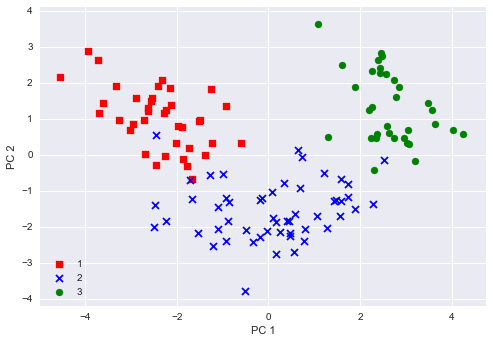

In [110]:
colors = ['r', 'b', 'g']
markers = ['s', 'x', 'o']

for l, c, m in zip(np.unique(y_train), colors, markers):
    plt.scatter(x_transform[y_train==l, 0], x_transform[y_train==l, 1],c=c, label=l, marker=m)

plt.xlabel('PC 1')
plt.ylabel('PC 2')
plt.legend(loc='lower left')
plt.show()

### Example: MNIST Dataset Handwritten Digits

(http://yann.lecun.com/exdb/mnist/)

C:\Users\Catia\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:85: DeprecationWarning: Function fetch_mldata is deprecated; fetch_mldata was deprecated in version 0.20 and will be removed in version 0.22. Please use fetch_openml.
  warnings.warn(msg, category=DeprecationWarning)
C:\Users\Catia\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:85: DeprecationWarning: Function mldata_filename is deprecated; mldata_filename was deprecated in version 0.20 and will be removed in version 0.22. Please use fetch_openml.
  warnings.warn(msg, category=DeprecationWarning)


(7000, 784) (7000,)


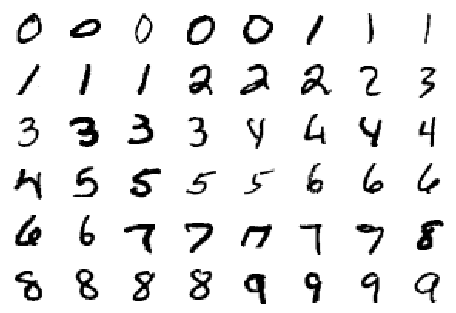

In [111]:
from sklearn.datasets import fetch_mldata

# load data
mnist = fetch_mldata('MNIST original')
# mnist = fetch_openml('mnist_784')

fig, ax = plt.subplots(6, 8, subplot_kw=dict(xticks=[], yticks=[]))
for i, axi in enumerate(ax.flat):
    axi.imshow(mnist.data[1250 * i].reshape(28, 28), cmap='gray_r')

# use only 1/10 of the data
X = mnist.data[::10]
labels = mnist.target[::10]

print(X.shape,labels.shape)

In [112]:
A = PCA(X.T,2,0)

y = X@A

In [113]:
print(A.shape,X.shape,y.shape,labels.shape)

(784, 2) (7000, 784) (7000, 2) (7000,)


C:\Users\Catia\Anaconda3\lib\site-packages\numpy\core\numeric.py:591: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order, subok=True)


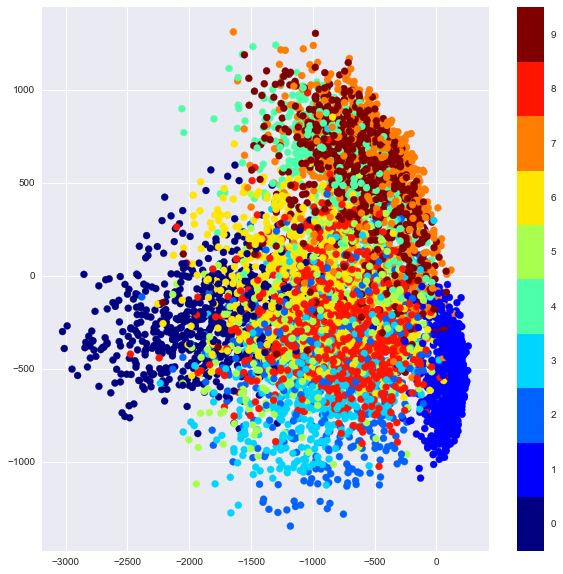

In [114]:
fig, ax = plt.subplots(figsize=(10, 10))
plt.scatter(y[:, 0], y[:, 1], c=labels, cmap=plt.cm.get_cmap('jet', 10))
plt.colorbar(ticks=range(10))
plt.clim(-0.5, 9.5);

## Example: Eigenfaces

* Part of this example comes from: http://scikit-learn.org/stable/auto_examples/decomposition/plot_faces_decomposition.html

Dataset consists of 400 faces


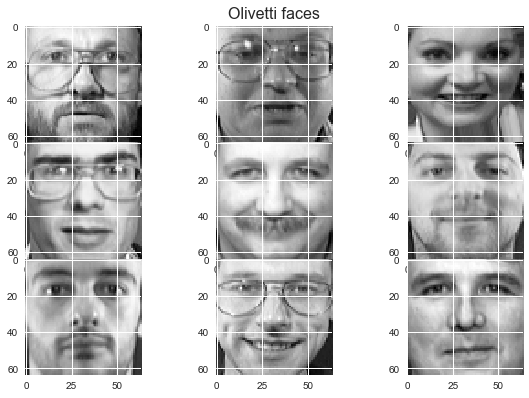

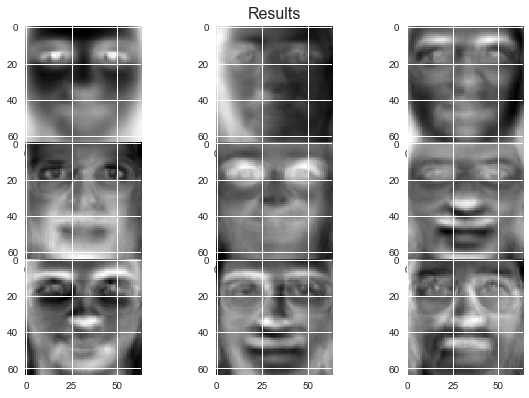

In [115]:
from sklearn.datasets import fetch_olivetti_faces
from sklearn.decomposition import PCA as PCA_skl

n_row, n_col = 3, 3
n_components = n_row * n_col
image_shape = (64, 64)

# Load faces 
dataset = fetch_olivetti_faces(shuffle=True)
faces = dataset.data
n_samples, n_features = faces.shape

print("Dataset consists of %d faces" % n_samples)

#Define function to plot imagery
def plot_gallery(title, images, n_col=n_col, n_row=n_row):
    plt.figure()
    plt.suptitle(title, size=16)
    for i, comp in enumerate(images):
        plt.subplot(n_row, n_col, i + 1)
        comp = comp.reshape((64,64))
        plt.imshow(comp,cmap='gray')
    plt.subplots_adjust(0.01, 0.05, 0.99, 0.93, 0.04, 0.)

scikit_pca = PCA_skl(n_components = n_components, whiten=True)
X_spca = scikit_pca.fit_transform(faces.T)

plot_gallery("Olivetti faces", faces[0:n_components,:])
plot_gallery('Results', X_spca.T)


## Example: Half-Moons

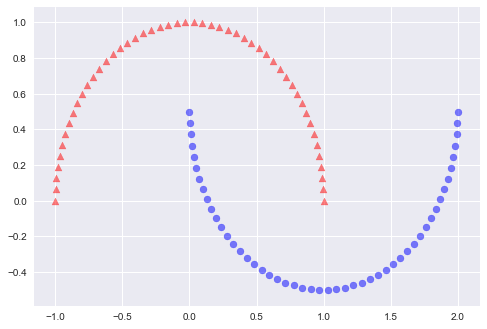

In [116]:
from sklearn.datasets import make_moons
X, y = make_moons(n_samples = 100, random_state = 123)
plt.scatter(X[y==0,0], X[y==0, 1], color='red', marker = '^', alpha=0.5)
plt.scatter(X[y==1,0], X[y==1, 1], color='blue', marker = 'o', alpha=0.5)
plt.show()

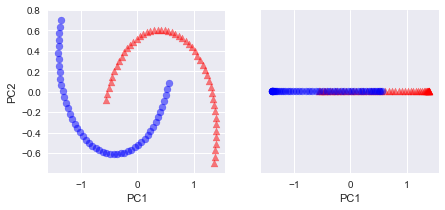

In [117]:
scikit_pca = PCA_skl(n_components = 2)
X_spca = scikit_pca.fit_transform(X)
fig, ax = plt.subplots(nrows=1,ncols=2,figsize=(7,3))
ax[0].scatter(X_spca[y==0,0], X_spca[y==0,1], color='red', marker = '^', alpha=0.5)
ax[0].scatter(X_spca[y==1,0], X_spca[y==1,1], color='blue', marker = 'o', alpha=0.5)
ax[1].scatter(X_spca[y==0,0], np.zeros((50,1)), color='red', marker = '^', alpha=0.5)
ax[1].scatter(X_spca[y==1,0], np.zeros((50,1)), color='blue', marker = 'o', alpha=0.5)
ax[0].set_xlabel('PC1')
ax[0].set_ylabel('PC2')
ax[1].set_ylim([-1,1])
ax[1].set_yticks([])
ax[1].set_xlabel('PC1')
plt.show()

# Reading Assignment

* Chapter 5 **"Compressing Data via Dimensionality Reduction"** from Python Machine Learning textbook